In [1]:
import numpy as np
import torch

In [2]:
ckp = torch.load('./ckp/6000.ckp')

In [9]:
ckp

myNet(
  (X): Input()
  (Ae): AdaptiveLIFNodes()
  (Y): AdaptiveLIFNodes()
  (X_to_Ae): Connection(
    (source): Input()
    (target): AdaptiveLIFNodes()
  )
  (Ae_to_Ae): Connection(
    (source): AdaptiveLIFNodes()
    (target): AdaptiveLIFNodes()
  )
  (Ae_to_Y): DAConnection(
    (source): AdaptiveLIFNodes()
    (target): AdaptiveLIFNodes()
  )
  (Y_to_Y): Connection(
    (source): AdaptiveLIFNodes()
    (target): AdaptiveLIFNodes()
  )
)

In [13]:
ckp.X_to_Ae.w.shape

torch.Size([784, 100])

In [1]:
class DAconnection():
    def __init__(
        self,
        nu: Optional[Union[float, Sequence[float]]] = None,
        weight_decay_s: float = 0.0,
        weight_decay_l: float = 0.0,
        **kwargs,
    ):
        
        self.wl = 0.2 
        self.ws = 0.1
        self.weight_decay_s = 1.0 - weight_decay_s
        self.weight_decay_l = 1.0 - weight_decay_l
    
    def DASTDP(da):
        
        

SyntaxError: invalid syntax (<ipython-input-1-5111940c8f88>, line 10)

In [ ]:
class node():
    def __init__(
    
        

In [ ]:
for i in range(timesteps):
    for j in range(connections):
        presyn[j].s[i] = 1
        connection[j].forward()
        
    for j in range(connections):
        connection[j].update()
    
        

In [ ]:
Si = np.zeros([500])
Sj = np.zeros([500])
wl = np.zeros([500])
ws = np.zeros([500])
w_mstdp = np.zeros([500])
trace_i= np.zeros([500])
trace_j= np.zeros([500])
elig= np.zeros([500])


In [ ]:
for i in range(500):
    trace_i[i] = trace_i[i-1] + Si[i]
    trace_j[i] = trace_j[i-1] + Sj[i]
    update = 0
    if Si[i]:
        update += trace_j[i]
    if Sj[i]:
        update -= trace_i[i]
    ws[i]=ws[i-1]*decay + update
    elig[i]=elig[i-1]*decay + update
        

# forgetting curve

In [2]:
import numpy as np
from scipy import optimize, stats
import math
import random
import matplotlib.pyplot as plt

In [38]:
class Synapse():
    def __init__(self, decay_s, decay_l, lr):
        self.wmax=1
        self.wmin=0
        self.ws=0
        self.wl=0.00
        self.w=0
        self.lr=lr
        self.decay_s=1-decay_s
        self.decay_l=1-decay_l
        self.w_his = [0,]
        self.wl_his = [0,]
        self.da_his = [0,]
    
    def learn(self):
        self.ws += self.lr*((0.1+self.w)/(1+self.w))*(self.wmax**2-self.w**2)
        
    def DA(self):
        return (1-self.w)/(1+self.w)
    
    def decay_consolidate(self, da):
        transfer = 2e-1*da*self.ws
        self.wl += transfer
        self.ws -= transfer
        
        self.ws *= self.decay_s
        self.wl *= self.decay_l
        self.w =  self.wl + self.ws
        
        self.w_his.append(self.w)
        self.wl_his.append(self.wl)
        self.da_his.append(da)
        


In [77]:
def simulation(decay_s, decay_l, lr, decay_da, T=[0,0,0,0]):
    
    syn = Synapse(decay_s, decay_l, lr)
    #learning 1
    da = syn.DA()
    for i in range(T[0]):
        syn.learn()
        syn.decay_consolidate(da)
        da *= decay_da
        
    #learning interval
    DA = np.random.binomial(1, 0.01, T[1]) * np.random.normal(0.3, 0.1, T[1]).clip(0,1)
    for i in range(T[1]):
        da = DA[i]
        syn.decay_consolidate(da)
     
    #learning 2
    #da = 1-np.exp(-T[1])
    da = syn.DA()
    for i in range(T[2]):
        syn.learn()
        syn.decay_consolidate(da)
        da *= decay_da
    
    #test interval
    DA = np.random.binomial(1, 0.01, T[3]) * np.random.normal(0.3, 0.1, T[3]).clip(0,1)
    for i in range(T[3]):
        da = DA[i]
        syn.decay_consolidate(da)
        
    return syn

In [78]:
decay_s = 2e-3
decay_l = 0
decay_da = 0.6
lr = 5e-1

In [79]:
T = [0,6*24*7,10,6*24*10]
syn0 = simulation(decay_s, decay_l, lr, decay_da, T)

In [80]:
syn0.w_his[-1]

0.3106225223907913

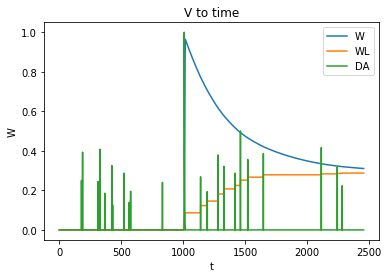

In [81]:
time = T[0]+T[1]+T[2]+T[3]+1
plt.plot(range(time), syn0.w_his, label = "W")
plt.plot(range(time), syn0.wl_his, label = "WL")
plt.plot(range(time), syn0.da_his, label = "DA")
plt.xlabel('t')
plt.title("V to time")
plt.legend()
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

In [82]:
T = [5,6*24*7,5,6*24*10]
syn1 = simulation(decay_s, decay_l, lr, decay_da, T)

In [83]:
syn1.w_his[-1]

0.41653129044286424

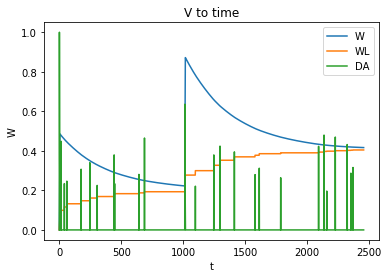

In [84]:
time = T[0]+T[1]+T[2]+T[3]+1
plt.plot(range(time), syn1.w_his, label = "W")
plt.plot(range(time), syn1.wl_his, label = "WL")
plt.plot(range(time), syn1.da_his, label = "DA")
plt.xlabel('t')
plt.title("V to time")
plt.legend()
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

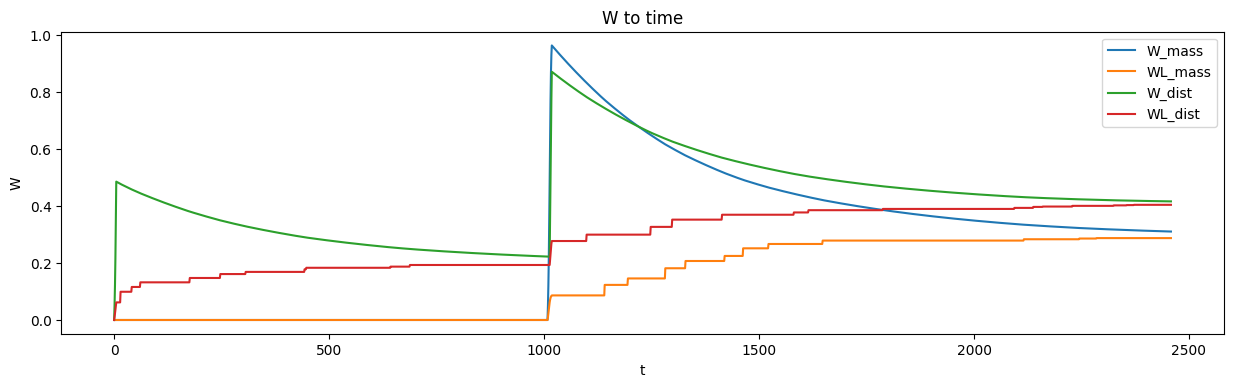

In [85]:
time = T[0]+T[1]+T[2]+T[3]+1
f = plt.figure()
f.set_figwidth(15)
f.set_dpi(100)
#f.set_figheight(1)
plt.plot(range(time), syn0.w_his, label = "W_mass")
plt.plot(range(time), syn0.wl_his, label = "WL_mass")
plt.plot(range(time), syn1.w_his, label = "W_dist")
plt.plot(range(time), syn1.wl_his, label = "WL_dist")
plt.xlabel('t')
plt.title("W to time")
plt.legend()
plt.ylabel('W')
plt.savefig('SpaceEff.png')
plt.show()

In [91]:
T = [0,6*24*7-5,15,6*24*10]
syn2 = simulation(decay_s, decay_l, lr, decay_da, T)
syn2.w_his[-1]

0.3385095739323771

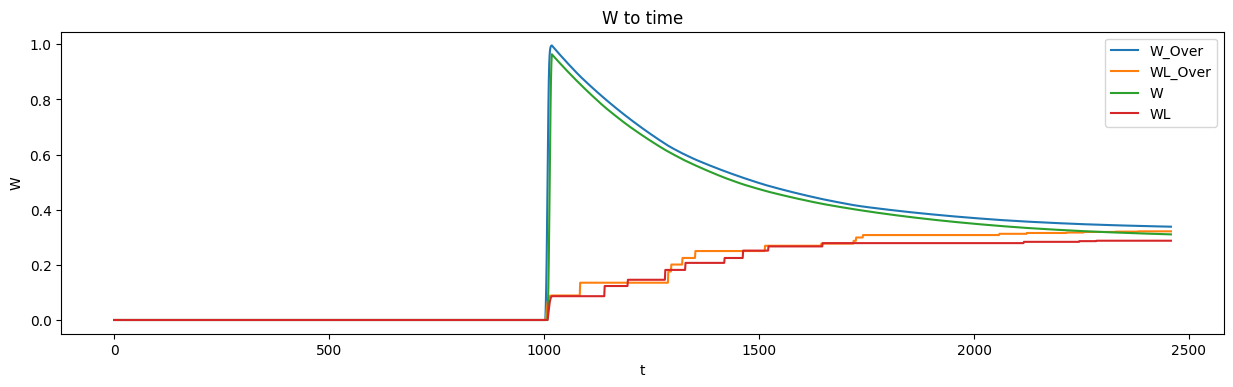

In [94]:
time = T[0]+T[1]+T[2]+T[3]+1
f = plt.figure()
f.set_figwidth(15)
f.set_dpi(100)
#f.set_figheight(1)
plt.plot(range(time), syn2.w_his, label = "W_Over")
plt.plot(range(time), syn2.wl_his, label = "WL_Over")
plt.plot(range(time), syn0.w_his, label = "W")
plt.plot(range(time), syn0.wl_his, label = "WL")
plt.xlabel('t')
plt.title("W to time")
plt.legend()
plt.ylabel('W')
plt.savefig('SpaceEff.png')
plt.show()